h_number: [0, 1, 2, 3, 4, 5]
xi: [-65895.05845515737, -65960.39977542235, -65970.84452949517, -65979.11907109202, -65991.04228461212, -66001.20904454554]
lli: [-65879.47, -65934.49192477256, -65933.47214627702, -65928.66532180988, -65929.79056928359, -65928.06741297327]
penalty: [15.589705157368549, 25.907850649793453, 37.37238321813762, 50.45374928213815, 61.2517153285341, 73.14163157226945]
selected: [1, 0, 0, 0, 0, 0]


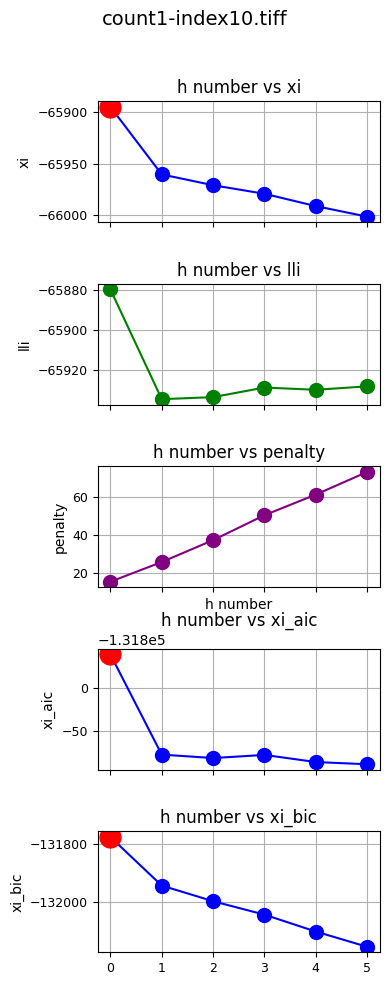

Position values:
[[31999.907002 nan nan]
 [20652.184844 80.674916 84.357044]]


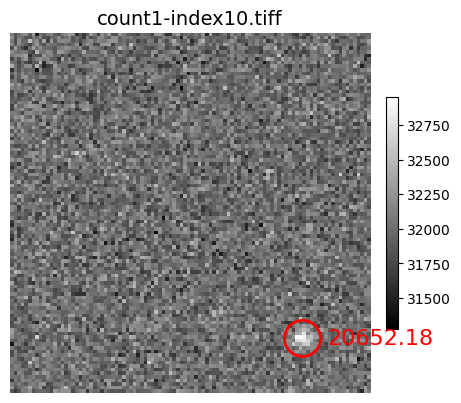

In [119]:
file_path = 'count1-index10.tiff'
import matplotlib.pyplot as plt
import re
import pandas as pd

# Load the CSV file

scores_file = "scores.csv"
df = pd.read_csv(scores_file)

df['extracted_filename'] = df['image_filename (h number)'].str.extract(r'([^\\/]+\.tiff)')

# Filter rows where the extracted filename matches the target file_path
filtered_data = df[df["extracted_filename"] == file_path]

# Extract values
h_number = filtered_data['h number'].tolist()
xi = filtered_data['xi'].tolist()
lli = filtered_data['lli'].tolist()
penalty = filtered_data['penalty'].tolist()
selected = filtered_data['selected?'].tolist()

xi_aic = filtered_data['xi_aic'].tolist()
xi_bic = filtered_data['xi_bic'].tolist()

# Display extracted values
print("h_number:", h_number)
print("xi:", xi)
print("lli:", lli)
print("penalty:", penalty)
print("selected:", selected)

# Create figure and subplots
fig, axes = plt.subplots(5, 1, figsize=(4, 10), sharex=True)
fig.suptitle(file_path, fontsize=14)

# Plot h number vs xi
axes[0].plot(h_number, xi, marker='o', color='blue', markersize=10)
for i, sel in enumerate(selected):
    if sel == 1:
        axes[0].plot(h_number[i], xi[i], marker='o', color='red', markersize=15)
axes[0].set_title('h number vs xi', fontsize=12)
axes[0].set_ylabel('xi', fontsize=10)
axes[0].tick_params(axis='both', labelsize=9)
axes[0].grid(True)
# axes[0].legend(fontsize=9, loc='center right')

# Plot h number vs lli
axes[1].plot(h_number, lli, marker='o', color='green', markersize=10)
axes[1].set_title('h number vs lli', fontsize=12)
axes[1].set_ylabel('lli', fontsize=10)
axes[1].tick_params(axis='both', labelsize=9)
axes[1].grid(True)

# Plot h number vs penalty
axes[2].plot(h_number, penalty, marker='o', color='purple', markersize=10)
axes[2].set_title('h number vs penalty', fontsize=12)
axes[2].set_xlabel('h number', fontsize=10)
axes[2].set_ylabel('penalty', fontsize=10)
axes[2].tick_params(axis='both', labelsize=9)
axes[2].grid(True)

# Plot h number vs xi_aic
axes[3].plot(h_number, xi_aic, marker='o', color='blue', markersize=10)
i = np.argmax(xi_aic)
axes[3].plot(h_number[i], xi_aic[i], marker='o', color='red', markersize=15)
axes[3].set_title('h number vs xi_aic', fontsize=12)
axes[3].set_ylabel('xi_aic', fontsize=10)
axes[3].tick_params(axis='both', labelsize=9)
axes[3].grid(True)

# Plot h number vs xi_bic
axes[4].plot(h_number, xi_bic, marker='o', color='blue', markersize=10)
i = np.argmax(xi_bic)
axes[4].plot(h_number[i], xi_bic[i], marker='o', color='red', markersize=15)
axes[4].set_title('h number vs xi_bic', fontsize=12)
axes[4].set_ylabel('xi_bic', fontsize=10)
axes[4].tick_params(axis='both', labelsize=9)
axes[4].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import numpy as np
import tifffile
from io import StringIO

# Function to process the value and extract mapping data
def extract_mapping_data(value):
    # Check if the value starts with '[[' indicating a nested array
    if value.startswith('[['):
        # Remove brackets and split into lines
        content = value.strip().replace('[', '').replace(']', '')
        # Use np.genfromtxt to parse into a numpy array
        mapping_data = np.genfromtxt(StringIO(content), delimiter=' ', ndmin=2)
    else:
        # If the value is not a nested array, treat it as a single value
        mapping_data = np.array([[float(value)]])
    
    # Extract intensity, x, and y (handling cases with only one row or multiple rows)
    intensity = mapping_data[1:, 0] if mapping_data.shape[0] > 1 else []
    x_coords = mapping_data[1:, 1] if mapping_data.shape[0] > 1 else []
    y_coords = mapping_data[1:, 2] if mapping_data.shape[0] > 1 else []
    
    return intensity, x_coords, y_coords

# Load the CSV file into a DataFrame
data = pd.read_csv(scores_file, )  # Assuming tab-separated CSV

# Filter rows where 'image_filename (h number)' matches the target file path
# Extract the part after the last '\\' and before " (" for matching
data['filename_base'] = data['image_filename (h number)'].str.extract(r'([^\\]+\.tiff) \(')

# Get the rows matching the target file and where 'selected?' is 1
# selected_row = data[(data['filename_base'] == file_path) & (data['selected?'] == 1)]
selected_row = data[(data['filename_base'] == file_path) & (data['h number'] == 1)]

# Extract the position values from the last column
if not selected_row.empty:
    position_column = selected_row.iloc[:, 8].values[0]  # Assuming positions are in the last column
    print("Position values:")
    print(position_column)
else:
    print("No matching rows found or no row marked as selected.")

pass

intensity, x_coords, y_coords = extract_mapping_data(position_column)

# # Extract intensity, x, and y
# intensity = mapping_data[1:, 0]
# x_coords = mapping_data[1:, 1]
# y_coords = mapping_data[1:, 2]

# Load the image data
image_data = tifffile.imread(file_path)

# Create the figure and axis
fig, ax = plt.subplots(figsize=(5, 5))

# Display the image
cax = ax.imshow(image_data, cmap='gray')

# Add the colorbar
cbar = plt.colorbar(cax, ax=ax, fraction=0.03, pad=0.04, )
cbar.ax.tick_params(labelsize=10)

plt.draw()

# Plot the circles and text for each valid coordinate
for i, (x, y, value) in enumerate(zip(x_coords, y_coords, intensity)):
    if not np.isnan(x) and not np.isnan(y):
        circle = Circle((x, y), radius=5, edgecolor='red', facecolor='none', lw=2)
        ax.add_patch(circle)
                # Convert data coordinates to display coordinates
        display_coords = ax.transData.transform((x + 7, y))
        # Convert display coordinates to figure coordinates
        fig_coords = fig.transFigure.inverted().transform(display_coords)
        
        # Add text in figure coordinates
        fig.text(fig_coords[0], fig_coords[1], f"{value:.2f}", 
                color='red', fontsize=16, 
                ha='left', va='center')
        # # text = ax.text(x + 7, y, f"{value:.2f}", color='red', fontsize=16, ha='left', va='center', zorder=1000)
        # text = ax.text(x - 14, y-10, f"{value:.2f}", color='red', fontsize=16, ha='left', va='center', zorder=1000)
        # text.set_clip_on(False)


# Set the title as the filename
ax.set_title(file_path, fontsize=14)

# Remove axis labels
ax.axis('off')

plt.show()

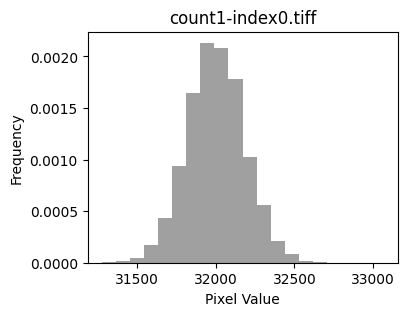

min model value: 10.0:
-66312.19


In [ ]:
# file_path = 'count1-index0.tiff'
from scipy.special import gammaln
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import argparse

def extract_pixel_values(image_path):
    # Open the image file
    with Image.open(image_path) as img:
        # Convert the image to a numpy array
        pixel_values = np.array(img)
    return pixel_values

def plot_histogram(pixel_values):
    # Flatten the pixel values array
    pixel_values_flat = pixel_values.flatten()
    
    # Plot the histogram
    plt.figure(figsize=(4,3))
    plt.hist(pixel_values_flat, density=True, bins=20, color='gray', alpha=0.75)
    plt.title(file_path)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()

pixel_values = extract_pixel_values(file_path)

# Plot the histogram of pixel values
plot_histogram(pixel_values)

Modelhk_at_xxyy = np.ones_like(pixel_values) * np.mean(pixel_values)
min_model_value = 1e1
sum_loglikelihood = np.sum(pixel_values * np.log(np.maximum(Modelhk_at_xxyy, min_model_value)) - Modelhk_at_xxyy - gammaln(pixel_values + 1))
print(f"min model value: {min_model_value}:")
print(sum_loglikelihood)


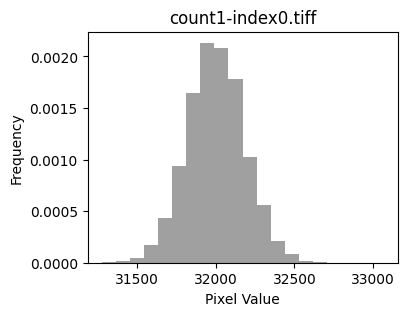

min model value: 10.0:
-66312.19


In [75]:
# file_path = 'count1-index0.tiff'
from scipy.special import gammaln
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import argparse

def extract_pixel_values(image_path):
    # Open the image file
    with Image.open(image_path) as img:
        # Convert the image to a numpy array
        pixel_values = np.array(img)
    return pixel_values

def plot_histogram(pixel_values):
    # Flatten the pixel values array
    pixel_values_flat = pixel_values.flatten()
    
    # Plot the histogram
    plt.figure(figsize=(4,3))
    plt.hist(pixel_values_flat, density=True, bins=20, color='gray', alpha=0.75)
    plt.title(file_path)
    plt.xlabel('Pixel Value')
    plt.ylabel('Frequency')
    plt.show()

pixel_values = extract_pixel_values(file_path)

# Plot the histogram of pixel values
plot_histogram(pixel_values)

Modelhk_at_xxyy = np.ones_like(pixel_values) * np.mean(pixel_values)
min_model_value = 1e1
sum_loglikelihood = np.sum(pixel_values * np.log(np.maximum(Modelhk_at_xxyy, min_model_value)) - Modelhk_at_xxyy - gammaln(pixel_values + 1))
print(f"min model value: {min_model_value}:")
print(sum_loglikelihood)
